# Assignment for ASML: Unsupervised learning

**Introduction** 


This assignment contains 13 questions, totalling to 100 marks. Please write the answers to each question in the boxes following directly underneath each question (some of these are R Code boxes, and some of these R Markdown boxes, depending on the character of the questions). If you need to add text to a Code box, please use the commenting symbol (#) at the beginning of the line.

You can make use of any existing R functions (including those in packages, as far as available), or R functions developed in the lectures and labs, **unless stated otherwise**.

We consider a data set known  as  the "faithful geyser data".  This is a data frame with 272 observations giving the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
Please use the following code to read the data in and display a scatterplot: 


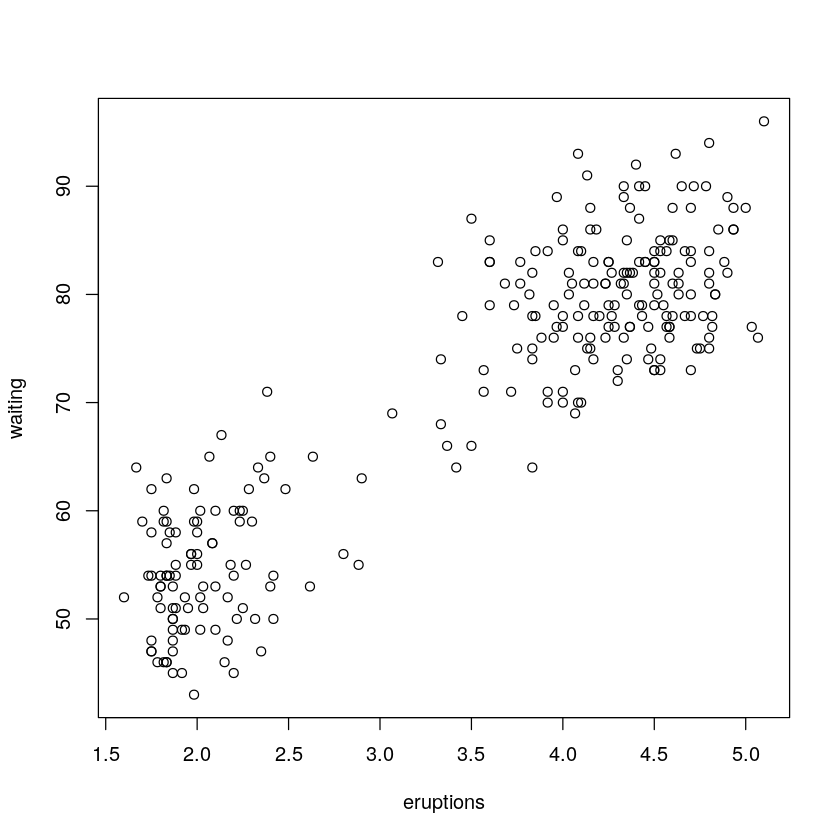

In [1]:
data(faithful)
plot(faithful)

 **Question 1** (6 marks)
 
 Compute the sample variance matrix as well as the correlation matrix of this data frame.

In [2]:
# YOUR CODE HERE

# Compute variance and correlation matrix
varmat<-var(faithful)
corrmat<-cor(faithful)

corrmat
varmat

,eruptions,waiting
eruptions,1.0000000,0.9008112
waiting,0.9008112,1.0000000


,eruptions,waiting
eruptions,1.302728,13.97781
waiting,13.977808,184.82331


**Question 2** (6 marks)

Interpret briefly the results from the previous question, with reference to the previously displayed scatterplot. 

-$Interpret$-

In the Faithful Eruption, variance(1.302728) is small. It means that the scatter of the data is quite concentrated, and the Waiting variance (184.82331) is significant, so the scatter of the data is spread. In the correlation, Eruption and Waiting have normalised covariance. Moreover, the value of correlation(0.9008112) is close to 1. Therefore, Eruption and Waiting are strongly correlated, and as seen in the scatter graph, they have a relation of a positive relation.

**Question 3** (2 marks)

Produce a histogram of the variable `eruptions`.


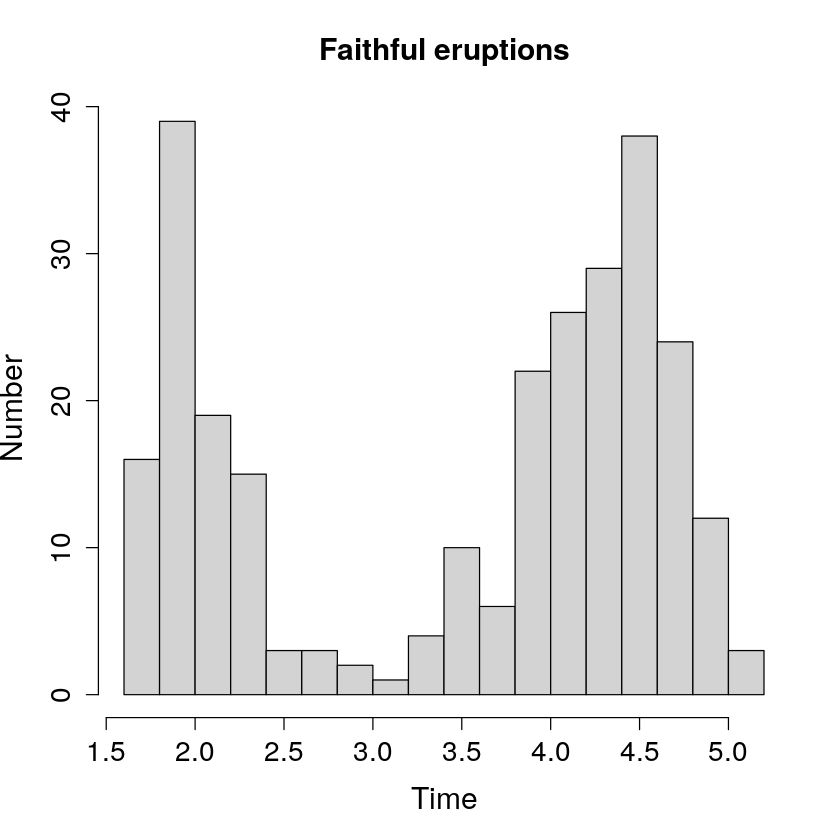

In [3]:
# YOUR CODE HERE

# Plot the histogram of Faithful eruption
hist(faithful$eruptions, main="Faithful eruptions", xlab="Time", ylab = "Number", cex.main=1.5, cex.lab = 1.5, cex.axis=1.4, breaks = 15)

**Question 4** (8 marks)

Now produce a histogram of the `waiting` variable, graphically overlaying a kernel density estimate of this variable.

In order to obtain the kernel density estimate, use R function `density` with its default options.


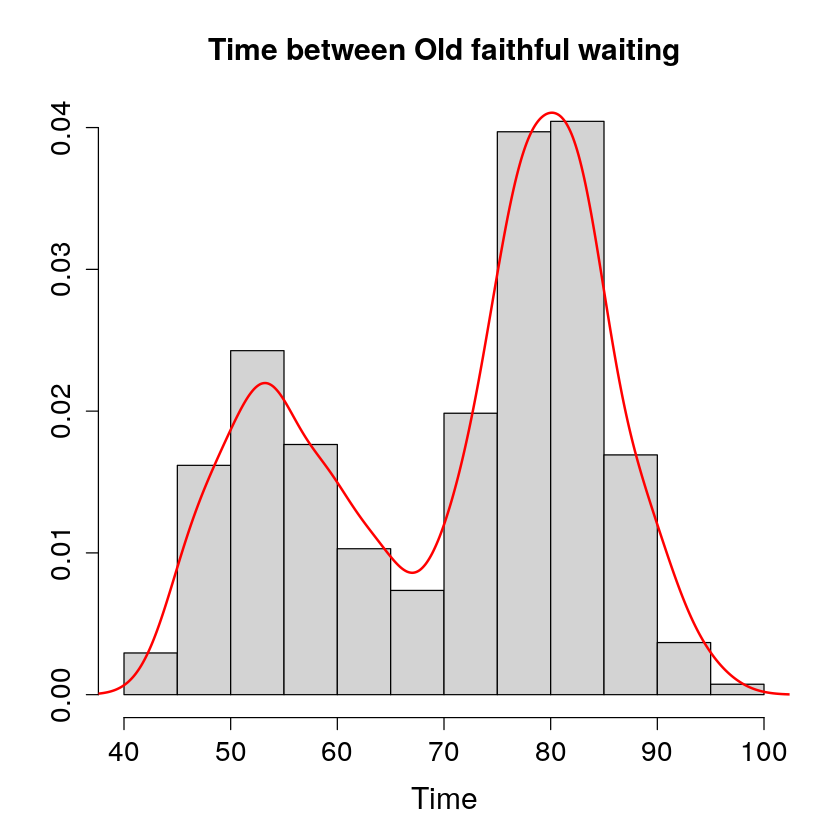

In [4]:
# YOUR CODE HERE

# Plot the Histogram of Faithful waiting with kernel density estimation
hist(faithful$waiting, main="Time between Old faithful waiting", xlab="Time",prob = TRUE, ylab = "", cex.main=1.5, cex.lab = 1.5, cex.axis=1.4, breaks = 15)
lines(density(faithful$waiting, kernel="gaussian", adjust=0.6), xlab="",ylab="", main="h=500", col = "red", lwd = 2)

**Question 5** (8 marks)

Use function `kde` (with default options) from R package `ks` in order to estimate the density of the bivariate data frame `faithful`.  Visualize the estimated density through a perspective plot.


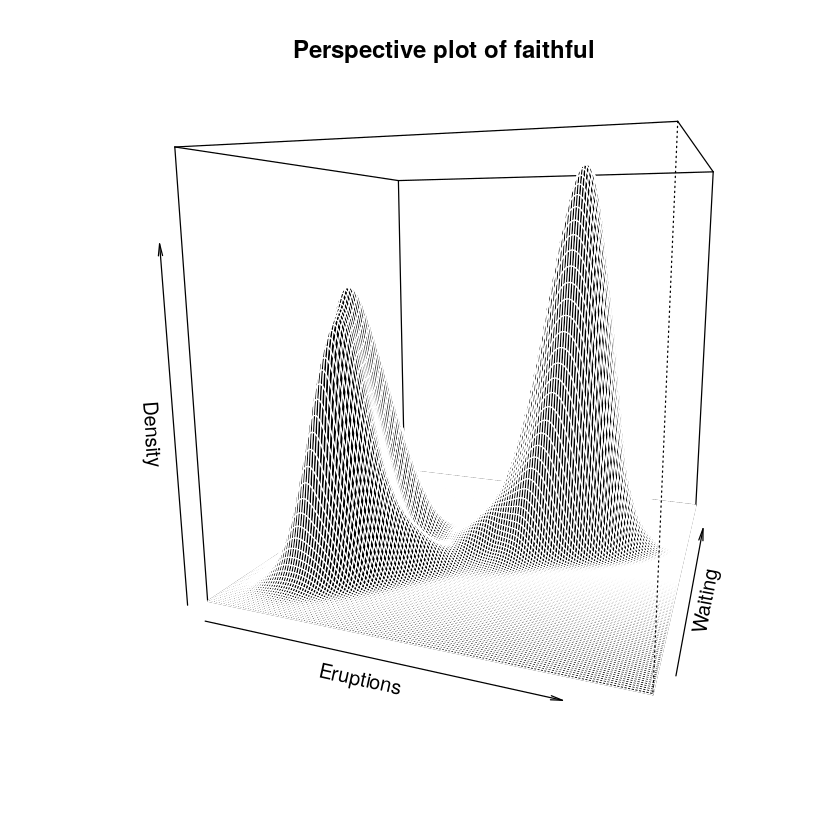

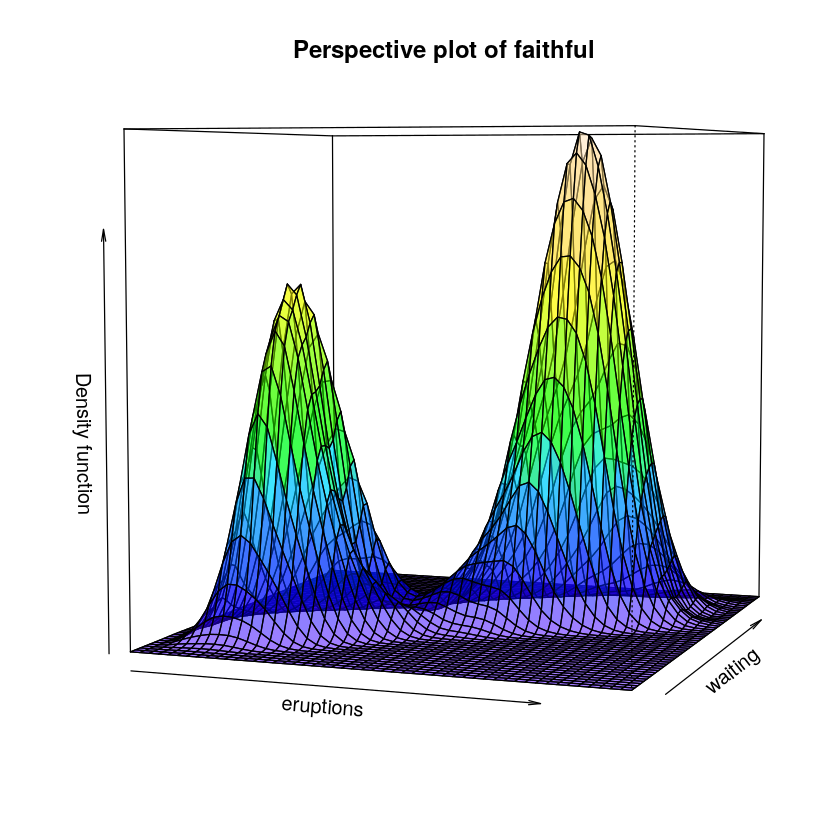

In [5]:
# YOUR CODE HERE

# Kernel density estimation
library('ks')
x <- as.matrix(faithful)
n <- nrow(x)
kdex<-kde(x)

# Plot the Perspective view of Faithful density
xranges <- unlist(kdex$eval.points[1])
yranges <- unlist(kdex$eval.points[2])
persp(xranges, yranges, kdex$estimate, phi = 10, theta = 20, col = "black", border = 0, main="Perspective plot of faithful", xlab="Eruptions", ylab = "Waiting", zlab="Density")
plot(kdex, display="persp",phi=5, theta=20, main="Perspective plot of faithful")

**Question 6** (12 marks)

Next we would like to implement a routine for automated bandwidth selection. 
For bivariate data (as here), it has been suggested in the literature to use the simple rule of thumb

$h_j= s_j n^{-1/6}$

where $s_j$ is the sample standard deviation of the j-th variable, and $n$ the sample size. Produce a function which implements this rule, and use it to compute the resulting bandwidths $h_1$  and $h_2$.   From this, produce a bandwidth matrix 

$H= \left(\begin{array}{cc} h_1^2 & 0\\ 0 & h_2^2 \end{array}\right)$,

and save it into an object `H`.


In [6]:
# YOUR CODE HERE

se<-sd(faithful$eruption)
sw<-sd(faithful$waiting)
n<-nrow(faithful)

# Make function for Rule of thumb
h<-function(s,n){
    return(s*n^(-1/6))
}

# Make the automated bandwidth matrix
he<-h(se,n)
hw<-h(sw,n)
H<-rbind(c(he^2,0),c(0,hw^2))
H

0.2010624,0.00000
0.0000000,28.52553


**Question 7** (10 marks)


Using the bandwidth matrix `H` in `kde`,  compute again the kernel density estimate of the `faithful` data.  Then produce two contourplots, with the first one showing the density estimate from Question 5, and the second one showing the density estimate from this question. Each plot should also display the original data points, and the axes of both plots should have the same ranges.



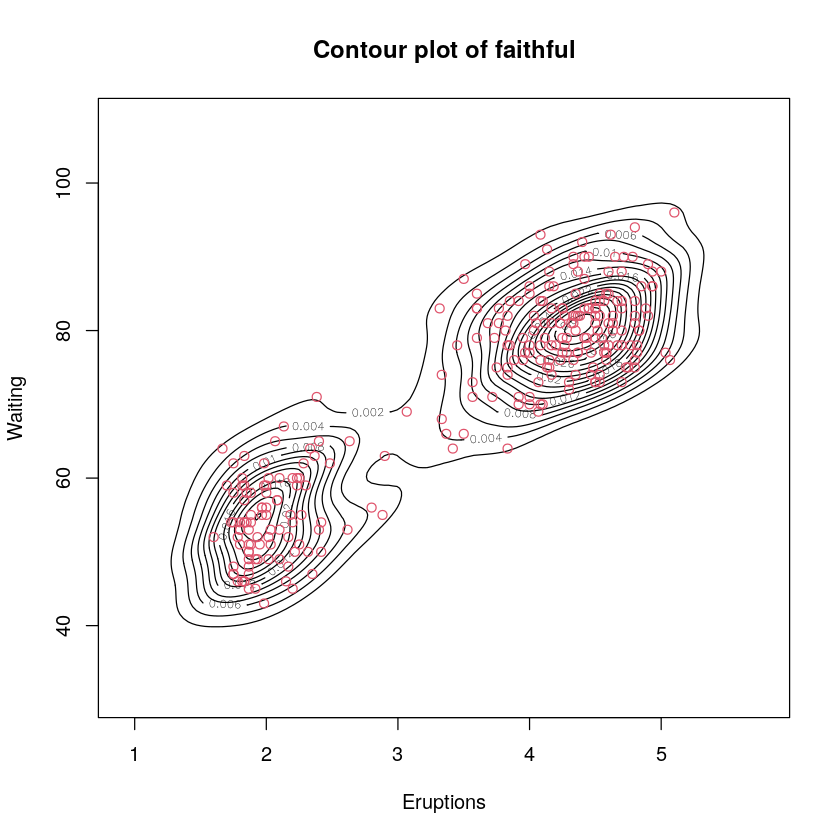

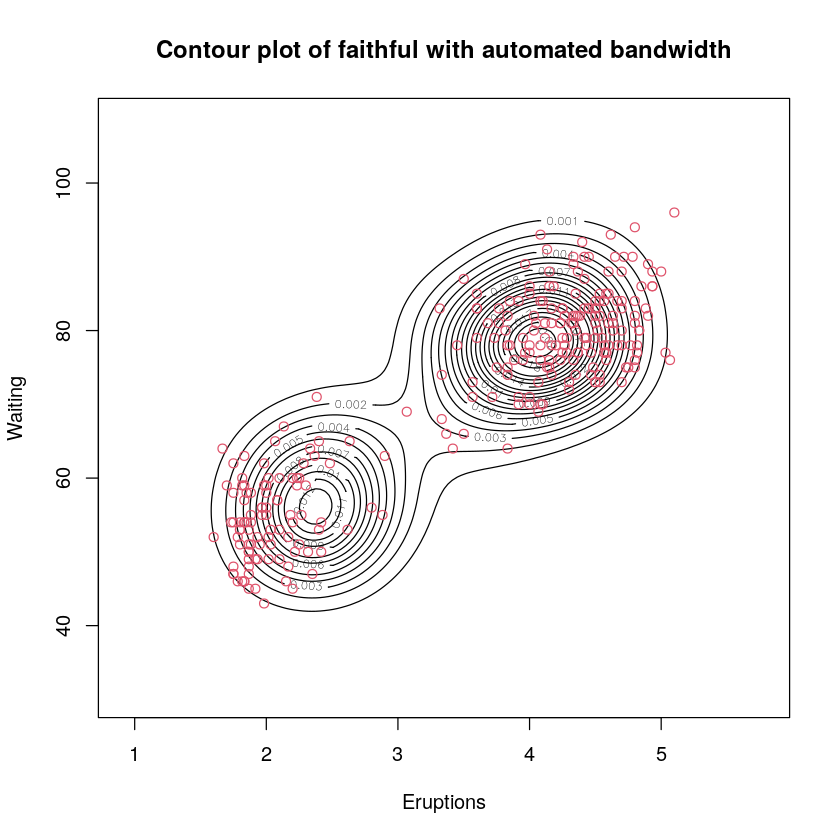

In [7]:
# YOUR CODE HERE
library('ks')

# Perform KDE
x <- as.matrix(faithful)
n <- nrow(x)
kdex1<-kde(x)
kdex2<-kde(x, H=H)

# Plot the contour of density and the scatter points with default bandwidth and automated bandwidth
xranges <- unlist(kdex$eval.points[1])
yranges <- unlist(kdex$eval.points[2])
contour(xranges, yranges, kdex1$estimate, nlevels=20, col = "black", main="Contour plot of faithful", xlab="Eruptions", ylab = "Waiting")
points(faithful$eruptions, faithful$waiting, col=2)
contour(xranges, yranges, kdex2$estimate, nlevels=20, col = 'black', main="Contour plot of faithful with automated bandwidth", xlab="Eruptions", ylab = "Waiting")
points(faithful$eruptions, faithful$waiting, col=2)

**Question 8** (6 marks)

Describe briefly what you see in the two plots: In which aspects are the two estimated densities different?

-$Describe\ briefly\ estimations$-

Far more important than the choice of the kernel is the choice of the bandwidth. We can use it with the rule of thumb. It is based on minimizing the asymptotic mean integrated squared error.
The first contour graph used default bandwidth, and the contour looked a little bit not smooth. However, after using the rule of thumb, the rule finds the expected bandwidth. Then, after using automated bandwidth, the contour looks smoother than before.

**Question 9** (12 marks)

Using again the bandwidths obtained in Question 6, compute and visualize a high-density region (HDR) 

$
{\cal L}(c)= \{ \boldsymbol{x} |\hat{f}(\boldsymbol{x})>c \}.
$

so that the integral

$\int_{ {\cal L}(c)}\hat{f}(\boldsymbol{x}) d \boldsymbol{x}$

is equal to 0.6. Your plot should also display the original data.



Loading required package: hdrcde

This is hdrcde 3.4



40%        50%        60%        70%        80%        90% 
0.01723965 0.02011675 0.02416858 0.02847505 0.03186719 0.03601967

[1]  4.5 81.0

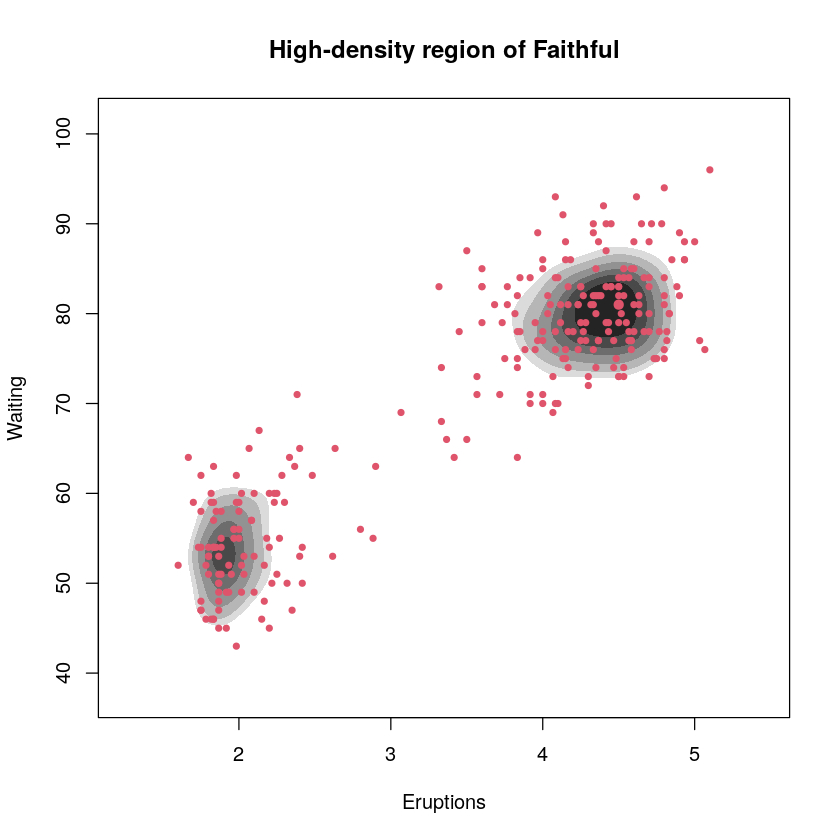

In [8]:
# YOUR CODE HERE
require(hdrcde)

# Plot the high density regioning from alpha=0.4
faithful.hdr <- hdr.2d(faithful$eruptions, faithful$waiting, prob=c(0.4,0.5,0.6,0.7,0.8,0.9), kde.package="ks",h=NULL)
faithful.hdr$falpha
faithful.hdr$mode
plot(faithful.hdr, show.points=TRUE, pointcol=2, main="High-density region of Faithful", xlab="Eruptions", ylab = "Waiting")

**Question 10** (7 marks)

Give a short critical assessment of the usefulness of the concept of high-density regions for clustering purposes.

-$Short\ critical\ assessment$-

The first advantage is that we do not have to select the number of clusters. In addition, by classifying noise points, there is an advantage that can be used not only to be robust to noise but also to search for outliers. It can also be applied to complex or geometric data by connecting dense areas to create clusters.

The disadvantage is that the amount of computation is higher than that of k-means, and there is a problem like a Curse of dimensionality in cluster analysis using other Euclidean distances. The problem with higher dimensions, that is, in the curse of dimensionality, is that using too many attributes when calculating Euclidean distance can cause irrelevant attributes to affect objects a lot and cause similarity measurement to go wrong. There is also a point that it may be difficult to find dense areas at a high level. Regardless of the high-dimensional problem, decision-making and tuning on the specified distance, minimum number of samples, and distance scale will be necessary.

**Question 11** (12 marks)

Using the functionmvnormalmixEMfrom the R package `mixtools` fit a Gaussian mixture model to the data frame `faithful`.  Assign the outcome to an object `mixmodel`.  Choose an appropriate number of mixture components `k` based on previous observations.  Finally, show a scatter plot of the fitted model with density contours of your choosing.  (You can consult `?plot.mixEM` to learn about the plotting options.) Set a seed to ensure reproducible results.

Loading required package: mixtools

mixtools package, version 1.2.0, Released 2020-02-05
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




number of iterations= 28 


[[1]]
[1]  2.036389 54.478518

[[2]]
[1]  4.289662 79.968117

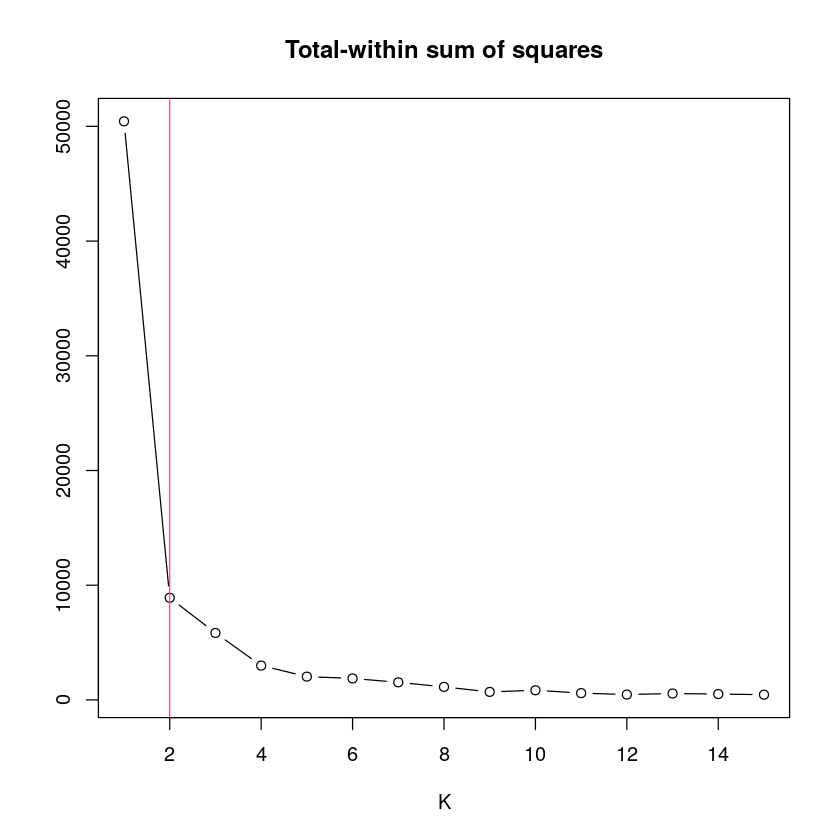

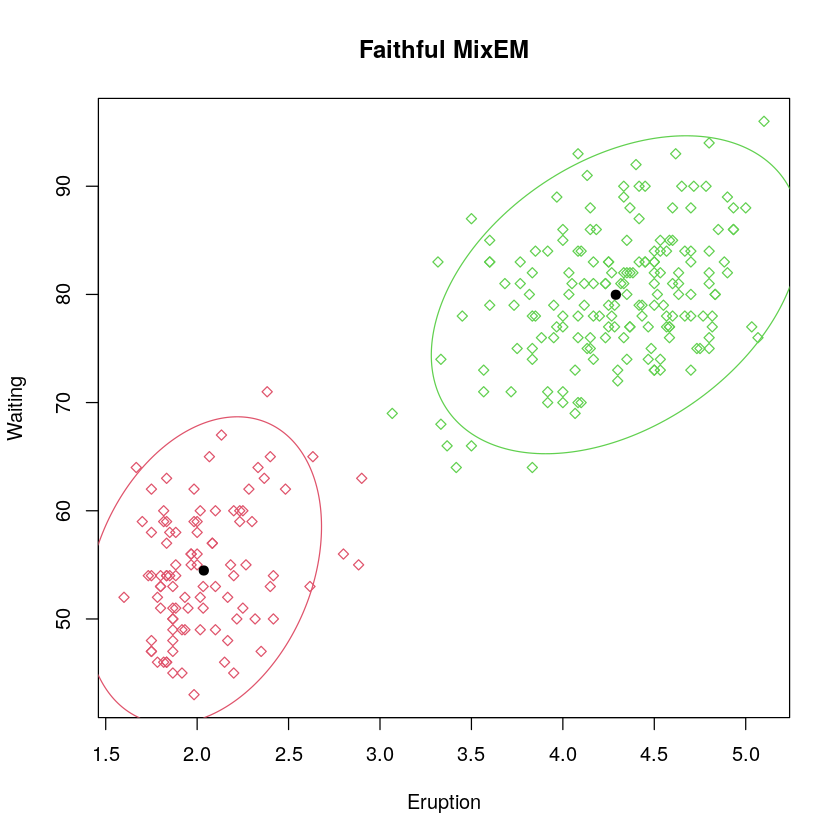

In [9]:
# YOUR CODE HERE
faithful.1 <- faithful[,c("eruptions","waiting")]

# To estimate K in elbow area
tot.withinss <- rep(0,15)
for (k in 1:15){
    tot.withinss[k] <- kmeans(faithful.1,k)$tot.withinss
}
# Plot Total within sum of squares
plot(tot.withinss, type="b",main="Total-within sum of squares" ,xlab='K',ylab='')
abline(v=2, col=2)

# Using EM algorithm for mixtures of multivariate normal distributions
require(mixtools)
faithful.mix <- mvnormalmixEM(faithful[,c("eruptions","waiting")] , k=2)
faithful.mix$mu

# Plot scatter and region
plot(faithful.mix, density = TRUE, w = 2, pch = 5, cex = 0.8,xlab2="Eruption", ylab2="Waiting",main2="Faithful MixEM")

**Question 12** (3 marks)

Use the fitted mixture model to assign every data point of the data frame `faithful` to one of the `k` clusters. Print the number of class members for each of the `k` classes.

In [10]:
# YOUR CODE HERE

# Find posterior
p<-faithful.mix$posterior
i<-0
# Count the number of each K with posterior which have 0.5 criterion
for (k in 1:nrow(p)){
    if (p[k,1]>0.5){
        i<-i+1
    }
}

# Print results
cat("K_1: ", i)
cat("\nK_2: ", nrow(p)-i)

K_1:  97
K_2:  175

**Question 13** (8 marks)

An important aspect of Gaussian mixture models is that it is a _generative model_ meaning we can use it to create new data by sampling from the model. Write an `R` function `sample_gmm` that takes arguments `size, prop, mus, sigmas` for the number of samples, the mixing probabilities, as well as the means vectors and covariance matrices. 

Return 100 new samples from the Gaussian mixture model and print them to a scatter plot. 

(Hint: you can sample from a multivariate Gaussian distribution using the function `rmvnorm` from the `mixtools` package.)

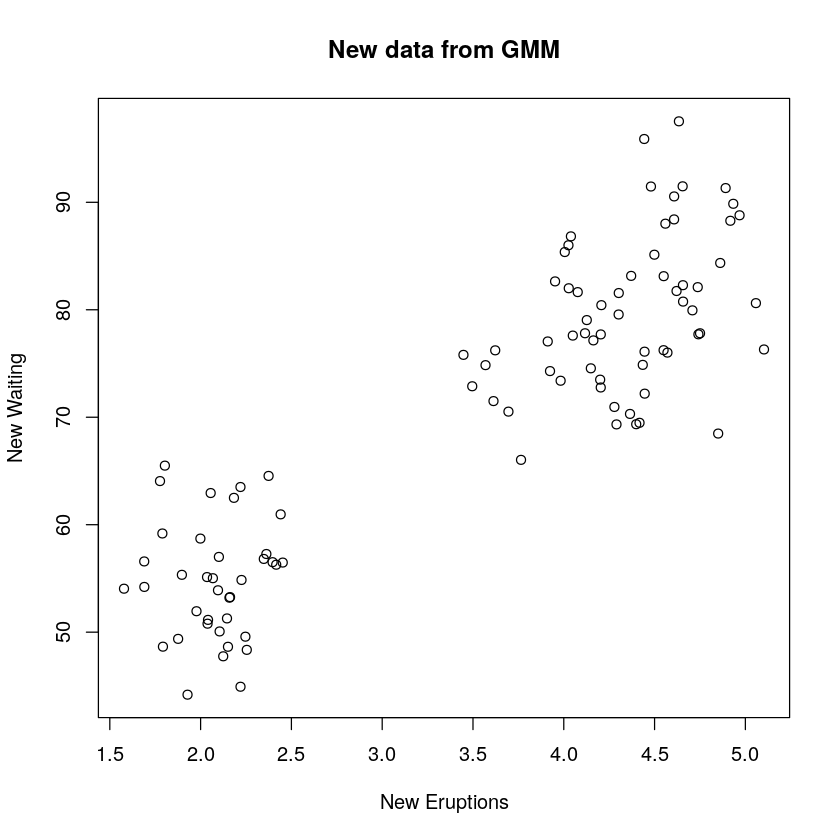

In [11]:
# YOUR CODE HERE

# Set parameters
set.seed(20)
n=100
p=faithful.mix$lambda
m=faithful.mix$mu
sig=faithful.mix$sigma
sim=c()

# Set function of iteration for gaussian mixture modelling
sample_gmm <- function(n, prop, mus, sigmas){
    x <- runif(n)
    cp <- cumsum(prop)
    # Check the density to sample each two gaussian distributions
    for (i in 1:n){
        k <-1
        while (x[i]>cp[k]){
            k<-k+1
        }
        sim <- rbind(sim,rmvnorm(1,as.numeric(unlist(mus[[k]])),matrix(unlist(sigmas[[k]]),2,2)))
    }    
    return(sim)
}
# Plot new datas
plot(sample_gmm(n,p,m,sig),main="New data from GMM", xlab="New Eruptions", ylab = "New Waiting")